In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile

In [2]:
pluto = pd.read_csv("./processed_data/merged_step5.csv")
pluto.tail()

,bbl,10_bldgclass,10_lotarea,10_bldgarea,10_histdist,10_landmark,10_ownername,10_xcoord,10_ycoord,11_bldgclass,...,dob_DM,dob_ALL,builtfar,residfar,commfar,facilfar,unbuiltfar,vacant,softsite,adjacency
1020,1020940032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,1.05,6.02,0.0,6.5,5.45,NaN,NaN,NaN
1021,1014360113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,10,5.99,4.00,0.0,4.0,-1.99,NaN,NaN,NaN
1022,1019239052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN
1023,1000540040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0.67,10.00,15.0,15.0,14.33,NaN,NaN,NaN
1024,1022370016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0.28,4.00,0.0,4.0,3.72,NaN,NaN,NaN


In [3]:
#get unique council districts
council_districts = [districts for districts in pluto['council'].unique() if not pd.isna(districts)]
council_districts

[1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 9.0, 8.0, 7.0, 10.0]

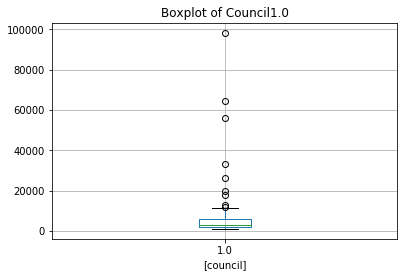

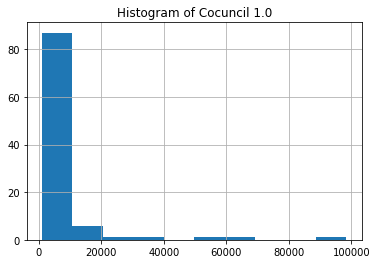

1.0 [ 1684.1 11150. ] 6989.0204081632655


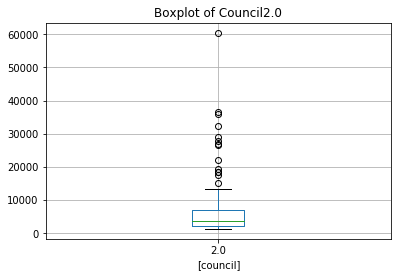

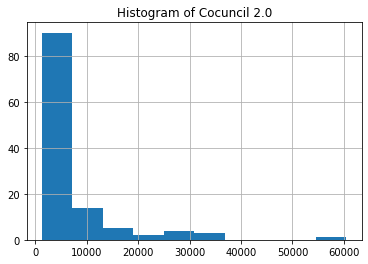

2.0 [ 1905.6 17662.6] 6797.64705882353


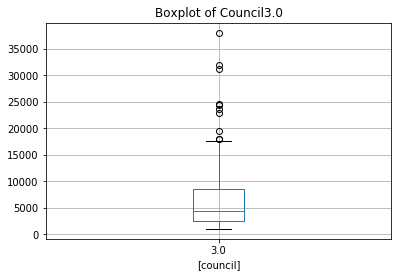

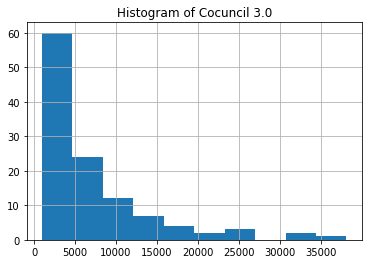

3.0 [ 1991.2 16582. ] 7013.121739130434


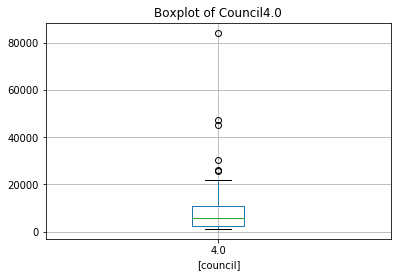

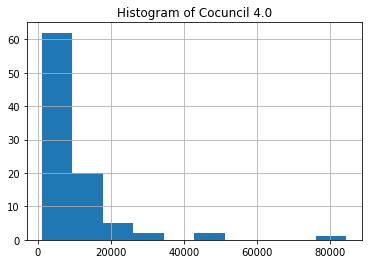

4.0 [ 1934.5 18205.2] 9266.380434782608


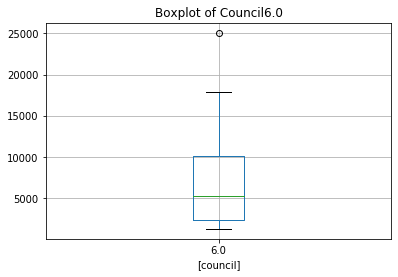

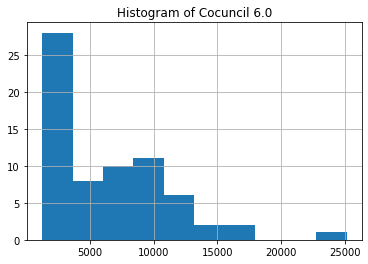

6.0 [ 1872.2 12267. ] 6551.5


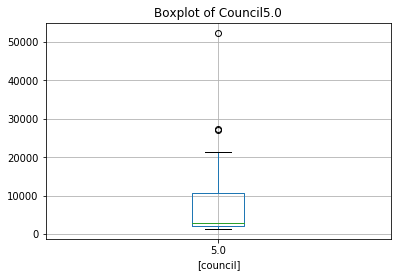

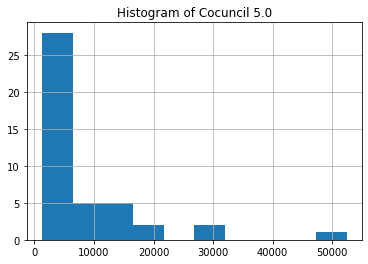

5.0 [ 1596.6 19342.8] 7829.860465116279


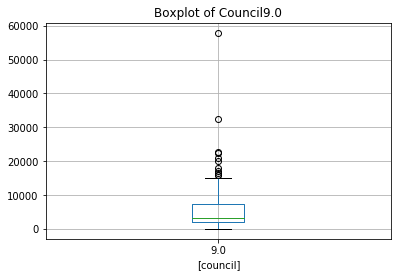

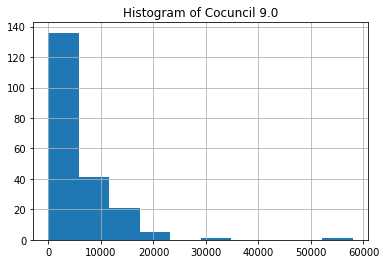

9.0 [ 1616. 13562.] 5838.707317073171


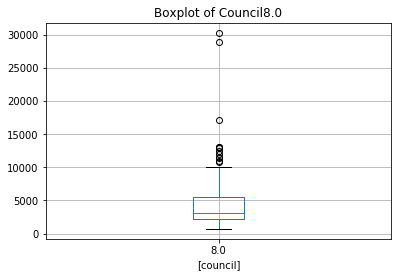

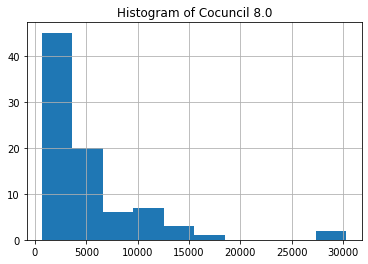

8.0 [ 1539.8 11557.4] 5139.857142857143


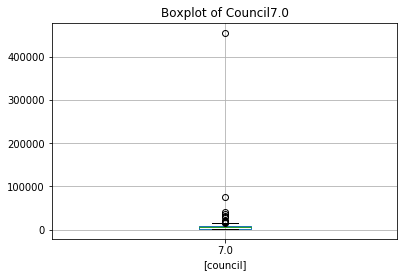

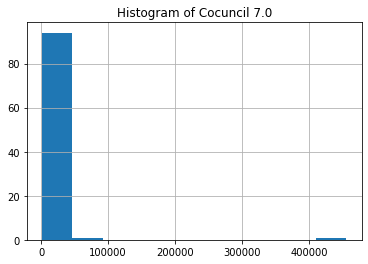

7.0 [ 1894. 17560.] 12457.09375


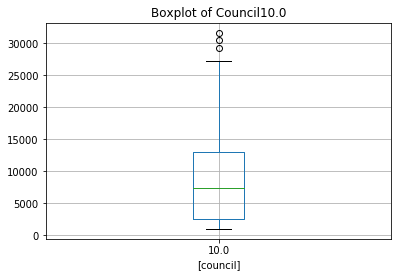

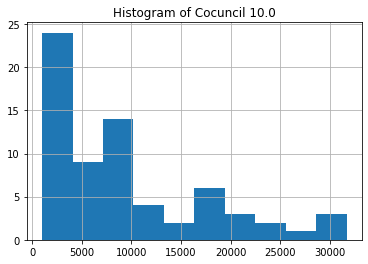

10.0 [ 2306.6 21467.5] 9523.735294117647


In [4]:
outliners_summary = []

for i in council_districts:
    df = pluto[pluto["council"] == i]
    lotarea = pluto[pluto["council"] == i]["20_lotarea"]
    quartiles = percentile(lotarea, [10, 90])
    mean = df["20_lotarea"].mean()
    std = df["20_lotarea"].std()
    outliners = [quartiles[0],quartiles[1]]
    
    #box plot
    df.boxplot(column = ['20_lotarea'], by = ['council'])
    plt.title("Boxplot of Council" + str(i))
    plt.suptitle("")
    
    #hist plot
    df.hist('20_lotarea')
    plt.title("Histogram of Cocuncil " + str(i))
    plt.show()
    
    print(i, quartiles, mean)
    #add outliners to summary list
    filtered = df[(df["20_lotarea"] > outliners[1]) | (df["20_lotarea"] < outliners[0])]['bbl']
    outliners_summary.append(filtered)

In [5]:
#combine all outliners into a single DataFrame
cd_outliners = pd.concat(outliners_summary)

In [6]:
cd_outliners.size

206

In [7]:
step_5 = pd.read_csv('./processed_data/merged_step5.csv')

In [8]:
step_5['outliner_lotarea'] = step_5['bbl'].isin(cd_outliners)

In [9]:
#create column for 
step_5.to_csv('./processed_data/merged_step6.csv', index = False)

In [10]:
len(step_5)

1025